In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rc = {
    'axes.grid': False,
    'axes.edgecolor': 'lightgrey',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.color': 'grey',
    'xtick.labelsize': 'small',
    'xtick.bottom': True,
    'xtick.major.size': 2.5,
    'ytick.color': 'grey',
    'ytick.major.size': 2.5,
    'ytick.left': True,
}

sns.set(style='whitegrid', rc=rc)

In [4]:
annots = pd.read_json('../../data/processed/train/labels/TRECIS_2018_2019-labels.jsonl',
                      lines=True, dtype=dict(postID=np.int64))

annots

,eventType,eventID,postID,Advice,CleanUp,ContextualInformation,Discussion,Donations,EmergingThreats,Factoid,...,News,Official,OriginalEvent,SearchAndRescue,Sentiment,ServiceAvailable,ThirdPartyObservation,Volunteer,Weather,Priority
0,typhoon,joplinTornado2011,72676276212731904,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.25
1,typhoon,joplinTornado2011,72678400833228800,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1.00
2,typhoon,joplinTornado2011,72682396750848000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.25
3,typhoon,joplinTornado2011,72693931619528704,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.50
4,typhoon,joplinTornado2011,72698562223407104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32140,wildfire,albertaWildfires2019,1135552993254920194,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0.25
32141,wildfire,albertaWildfires2019,1135557504484687872,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.25
32142,wildfire,albertaWildfires2019,1135560375074603008,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0.25
32143,wildfire,albertaWildfires2019,1135561309573902336,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.25


In [5]:
info_types = list(annots.columns[-26:-1])
print(info_types)

['Advice', 'CleanUp', 'ContextualInformation', 'Discussion', 'Donations', 'EmergingThreats', 'Factoid', 'FirstPartyObservation', 'GoodsServices', 'Hashtags', 'InformationWanted', 'Irrelevant', 'Location', 'MovePeople', 'MultimediaShare', 'NewSubEvent', 'News', 'Official', 'OriginalEvent', 'SearchAndRescue', 'Sentiment', 'ServiceAvailable', 'ThirdPartyObservation', 'Volunteer', 'Weather']


In [6]:
label_proportions = pd.DataFrame(index=info_types)
label_proportions['overall'] = annots[info_types].sum(axis='index') / len(annots)

priority_porportions = pd.DataFrame(index=annots.Priority.value_counts().index)
priority_porportions['overall'] = annots.Priority.value_counts() / len(annots)

for event in annots.eventID.unique():
    event_annots = annots[annots.eventID == event]
    
    label_proportions[event] = event_annots[info_types].sum(axis='index') / len(event_annots)
    priority_porportions[event] = event_annots.Priority.value_counts() / len(event_annots)
    
label_proportions

,overall,joplinTornado2011,italyEarthquakes2012,fireColorado2012,philipinnesFloods2012,costaRicaEarthquake2012,guatemalaEarthquake2012,typhoonPablo2012,queenslandFloods2013,bostonBombings2013,...,shootingDallas2017,flSchoolShooting2018,hurricaneFlorence2018,floodChoco2019,philippinesEarthquake2019,cycloneKenneth2019,southAfricaFloods2019,sandiegoSynagogueShooting2019,coloradoStemShooting2019,albertaWildfires2019
Advice,0.057334,0.173913,0.000000,0.012552,0.292614,0.004608,0.015152,0.040404,0.162939,0.026608,...,0.028855,0.003559,0.076566,0.000000,0.028129,0.025400,0.009314,0.001751,0.001992,0.098493
CleanUp,0.005444,0.010870,0.000000,0.004184,0.002841,0.000000,0.022727,0.000000,0.017572,0.000000,...,0.000000,0.001186,0.022042,0.003077,0.015499,0.004417,0.016935,0.000000,0.000000,0.000538
ContextualInformation,0.047721,0.000000,0.000000,0.000000,0.002841,0.009217,0.000000,0.005051,0.055911,0.494457,...,0.025248,0.838671,0.054524,0.000000,0.009185,0.072888,0.001693,0.001751,0.042829,0.016146
Discussion,0.079515,0.054348,0.000000,0.029289,0.005682,0.013825,0.000000,0.045455,0.031949,0.223947,...,0.051849,0.627521,0.175174,0.000000,0.004018,0.127554,0.031329,0.031524,0.013944,0.050592
Donations,0.024203,0.010870,0.000000,0.033473,0.178977,0.000000,0.022727,0.005051,0.019169,0.015521,...,0.000000,0.013049,0.029002,0.000000,0.001148,0.029818,0.016935,0.005254,0.000000,0.009688
EmergingThreats,0.054441,0.086957,0.000000,0.012552,0.045455,0.009217,0.840909,0.040404,0.051118,0.106430,...,0.025248,0.030842,0.098608,0.018462,0.066590,0.176146,0.030483,0.000000,0.002988,0.052745
Factoid,0.180712,0.054348,0.022727,0.142259,0.014205,0.036866,0.734848,0.080808,0.078275,0.050998,...,0.175834,0.068802,0.062645,0.049231,0.186567,0.419658,0.579170,0.817863,0.263944,0.209365
FirstPartyObservation,0.125463,0.163043,0.011364,0.029289,0.548295,0.032258,0.007576,0.000000,0.007987,0.008869,...,0.012624,0.001186,0.168213,0.000000,0.064868,0.005522,0.006774,0.022767,0.000000,0.076426
GoodsServices,0.004231,0.010870,0.000000,0.000000,0.056818,0.000000,0.000000,0.000000,0.000000,0.002217,...,0.000000,0.000000,0.006381,0.003077,0.001148,0.013252,0.002540,0.000000,0.000000,0.002153
Hashtags,0.278301,0.347826,0.011364,0.004184,0.000000,0.000000,0.015152,0.005051,0.640575,0.392461,...,0.303877,0.153025,0.441415,0.033846,0.195752,0.347874,0.299746,0.082312,0.030876,0.499462


In [7]:
priority_porportions

,overall,joplinTornado2011,italyEarthquakes2012,fireColorado2012,philipinnesFloods2012,costaRicaEarthquake2012,guatemalaEarthquake2012,typhoonPablo2012,queenslandFloods2013,bostonBombings2013,...,shootingDallas2017,flSchoolShooting2018,hurricaneFlorence2018,floodChoco2019,philippinesEarthquake2019,cycloneKenneth2019,southAfricaFloods2019,sandiegoSynagogueShooting2019,coloradoStemShooting2019,albertaWildfires2019
0.25,0.722943,0.391304,0.738636,0.548117,0.678977,0.852535,0.310606,0.535354,0.560703,0.722838,...,0.938683,0.670225,0.895012,0.987692,0.732491,0.652126,0.299746,0.345009,0.709163,0.699677
0.50,0.158407,0.413043,0.068182,0.330544,0.110795,0.082949,0.484848,0.328283,0.247604,0.155211,...,0.039225,0.263345,0.067865,0.012308,0.164179,0.199890,0.510584,0.560420,0.034861,0.198062
0.75,0.106797,0.119565,0.159091,0.121339,0.210227,0.059908,0.143939,0.136364,0.170927,0.106430,...,0.017133,0.060498,0.029582,NaN,0.101033,0.139702,0.184589,0.075306,0.202191,0.078579
1.00,0.011853,0.076087,0.034091,NaN,NaN,0.004608,0.060606,NaN,0.020767,0.015521,...,0.004959,0.005931,0.007541,NaN,0.002296,0.008283,0.005080,0.019264,0.053785,0.023681


In [8]:
def get_squared_error_func(target_col):
    return lambda x: (target_col['overall'] - x) ** 2


def get_error_scores(df, error_func=get_squared_error_func):
    return df.apply(error_func(df), axis='index')


def get_event_type(event_id, annots=annots):
    return annots[annots.eventID == event_id].eventType.values[0]


def get_event_tweet_count(event_id):
    return annots[annots.eventID == event_id].eventID.count()


def get_event_proportion(event_id):
    return get_event_tweet_count(event_id) / len(annots)


def rank_by_sim_in_props(df):
    return np.sqrt(get_error_scores(df).mean()).sort_values().argsort()

In [9]:
ranks = pd.DataFrame(annots.eventID.unique(), columns=['event_id'])

# Calculate similarity in proportions rank (RMSE of proportions in overall/candidate-test  data sets)
sim_rank_labels = rank_by_sim_in_props(label_proportions)
sim_rank_priority = rank_by_sim_in_props(priority_porportions)


ranks['event_type'] = ranks.event_id.apply(get_event_type)
ranks['num_tweets'] = ranks.event_id.apply(get_event_tweet_count)
ranks['%_of_tot'] = ranks.event_id.apply(get_event_proportion)
ranks['%_rest'] = 1.0 - ranks['%_of_tot']

# Similarity rankings by lowest RMSE in proportions when compared to the overall data
ranks['rank_labels'] = ranks.event_id.map(sim_rank_labels)
ranks['rank_priority'] = ranks.event_id.map(sim_rank_priority)

ranks['avg_rank'] = ranks[['rank_labels', 'rank_priority']].mean(axis='columns')
# ranks['weighted_rank'] = 0.75 * ranks['rank_labels'] + 0.25 * ranks['rank_priority']
ranks['weighted_rank'] = 0.5 * ranks['rank_labels'] + 0.5 * ranks['rank_priority']

ranks

,event_id,event_type,num_tweets,%_of_tot,%_rest,rank_labels,rank_priority,avg_rank,weighted_rank
0,joplinTornado2011,typhoon,92,0.002862,0.997138,14,28,21.0,21.0
1,italyEarthquakes2012,earthquake,88,0.002738,0.997262,16,10,13.0,13.0
2,fireColorado2012,wildfire,239,0.007435,0.992565,7,23,15.0,15.0
3,philipinnesFloods2012,flood,352,0.010950,0.989050,26,13,19.5,19.5
4,costaRicaEarthquake2012,earthquake,217,0.006751,0.993249,24,15,19.5,19.5
5,guatemalaEarthquake2012,earthquake,132,0.004106,0.995894,32,30,31.0,31.0
6,typhoonPablo2012,typhoon,198,0.006160,0.993840,8,24,16.0,16.0
7,queenslandFloods2013,flood,626,0.019474,0.980526,15,18,16.5,16.5
8,bostonBombings2013,bombing,451,0.014030,0.985970,19,1,10.0,10.0
9,westTexasExplosion2013,bombing,152,0.004729,0.995271,6,20,13.0,13.0


In [10]:
sort_by = ['event_id', 'num_tweets']
aggregates = dict(event_id=pd.Series.count, 
                  num_tweets=np.mean)

ranks.groupby('event_type').agg(aggregates) \
                           .sort_values(sort_by)

,event_id,num_tweets
event_type,,
bombing,3,801.666667
wildfire,4,1272.750000
shooting,5,955.200000
typhoon,6,1299.166667
flood,7,521.285714
earthquake,8,1053.625000


bombing
                  event_id  num_tweets  %_of_tot  rank_labels  rank_priority  \
21        parisAttacks2015        1802  0.056058            2             16   
8       bostonBombings2013         451  0.014030           19              1   
9   westTexasExplosion2013         152  0.004729            6             20   

    avg_rank  weighted_rank  
21       9.0            9.0  
8       10.0           10.0  
9       13.0           13.0  


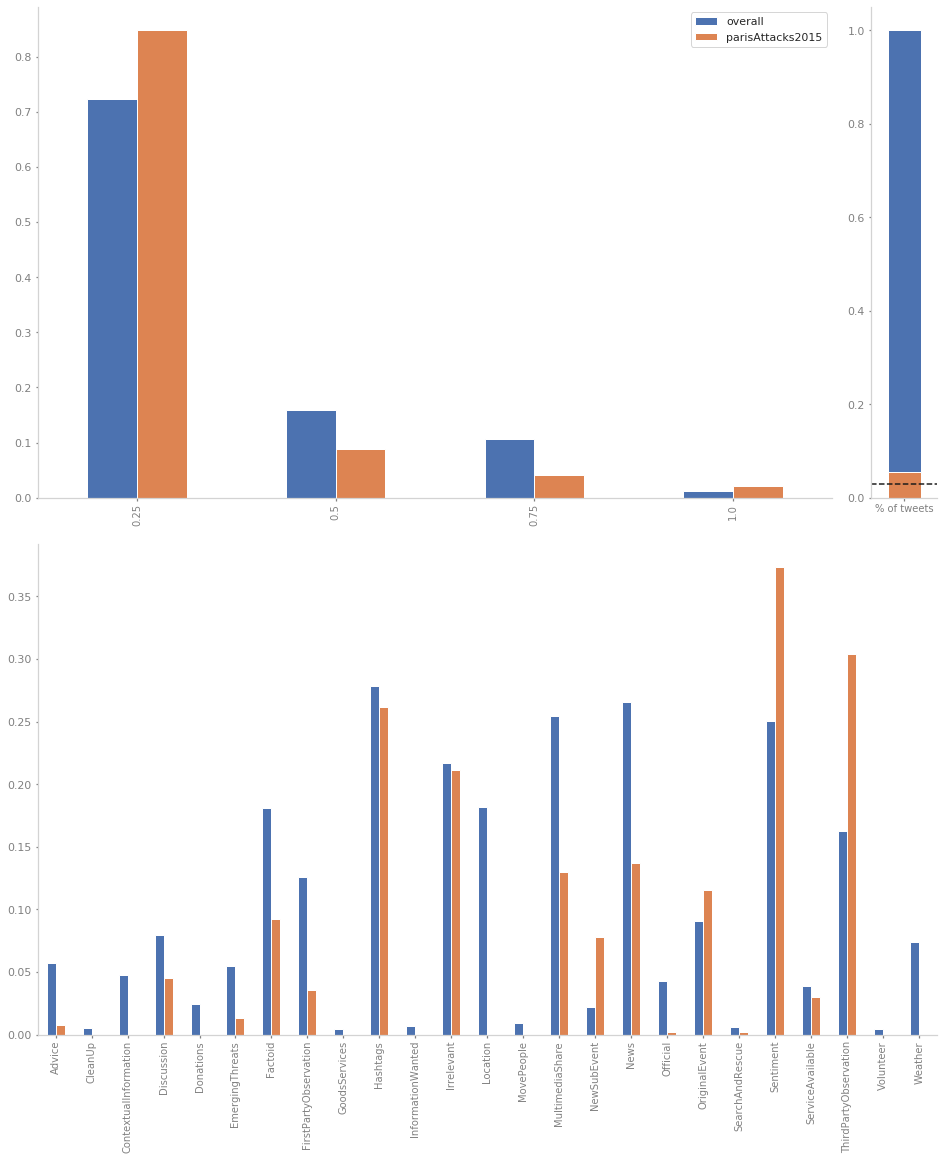

earthquake
                     event_id  num_tweets  %_of_tot  rank_labels  \
27  philippinesEarthquake2019        1742  0.054192            4   
20        nepalEarthquake2015        5359  0.166713            5   
1        italyEarthquakes2012          88  0.002738           16   
17        chileEarthquake2014         300  0.009333           18   
14        earthquakeBohol2013         467  0.014528           11   
4     costaRicaEarthquake2012         217  0.006751           24   
18   earthquakeCalifornia2014         124  0.003858           29   
5     guatemalaEarthquake2012         132  0.004106           32   

    rank_priority  avg_rank  weighted_rank  
27              2       3.0            3.0  
20              7       6.0            6.0  
1              10      13.0           13.0  
17             14      16.0           16.0  
14             27      19.0           19.0  
4              15      19.5           19.5  
18             32      30.5           30.5  
5              3

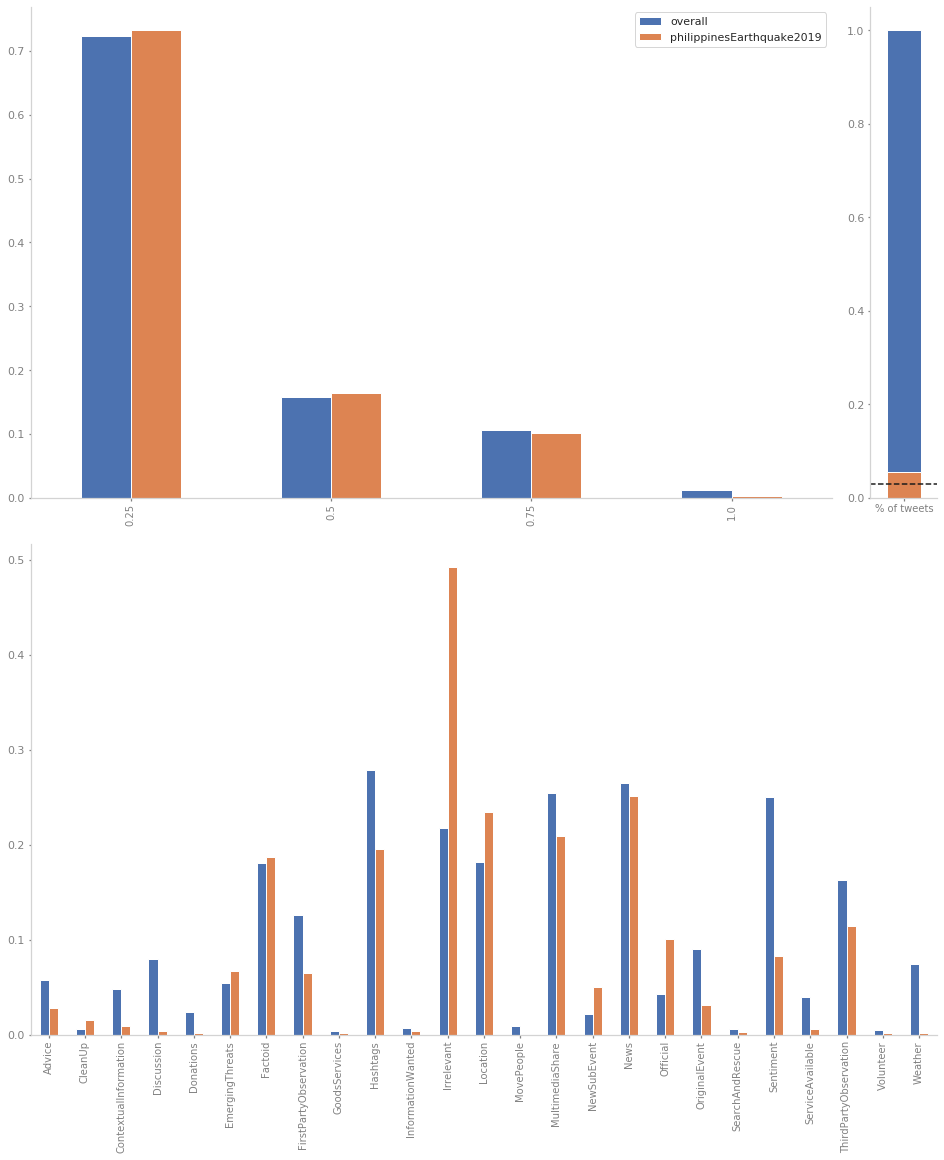

flood
                 event_id  num_tweets  %_of_tot  rank_labels  rank_priority  \
11       manilaFloods2013         313  0.009737           12             11   
7    queenslandFloods2013         626  0.019474           15             18   
12      floodColorado2013         206  0.006408            9             26   
3   philipinnesFloods2012         352  0.010950           26             13   
10      albertaFloods2013         646  0.020096           27             21   
29  southAfricaFloods2019        1181  0.036740           23             33   
26         floodChoco2019         325  0.010110           30             29   

    avg_rank  weighted_rank  
11      11.5           11.5  
7       16.5           16.5  
12      17.5           17.5  
3       19.5           19.5  
10      24.0           24.0  
29      28.0           28.0  
26      29.5           29.5  


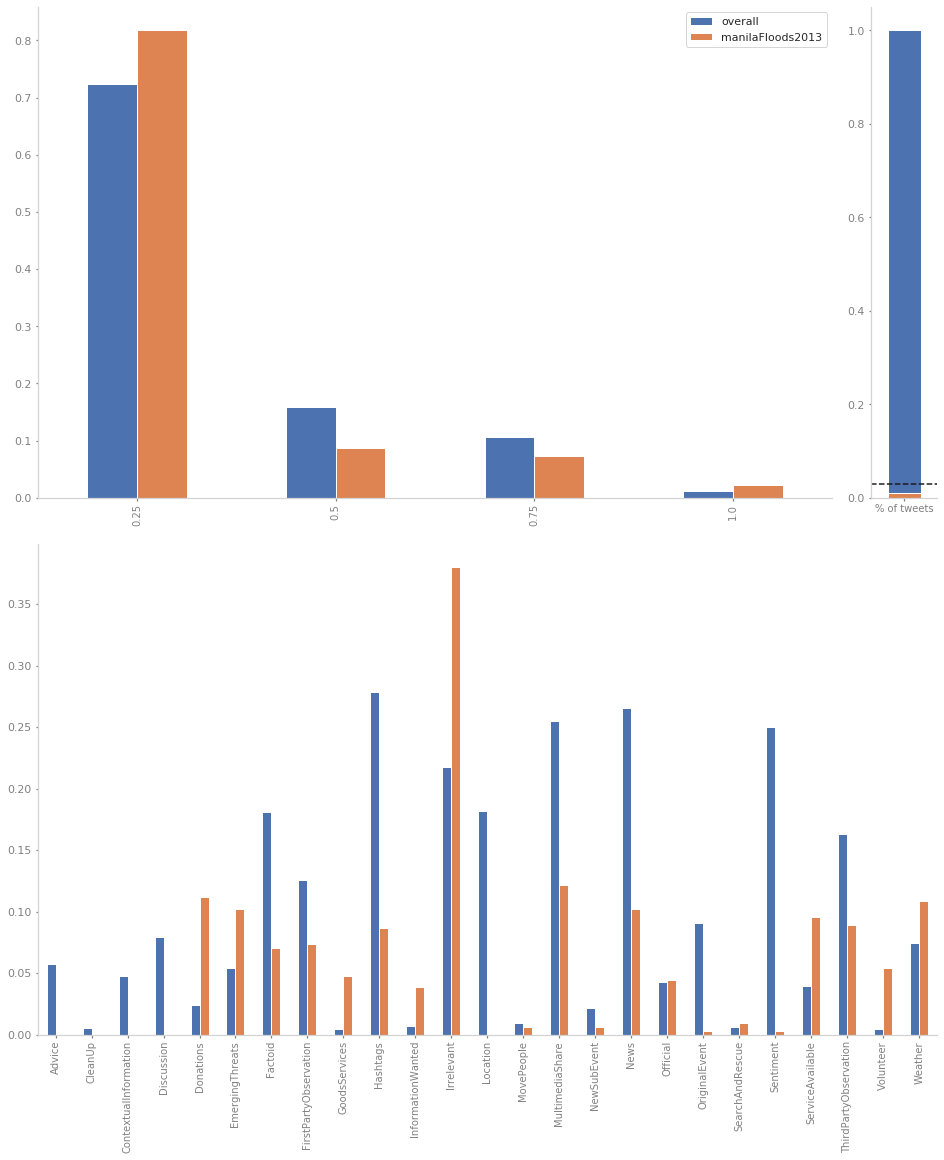

shooting
                         event_id  num_tweets  %_of_tot  rank_labels  \
15          laAirportShooting2013         140  0.004355           13   
23             shootingDallas2017        2218  0.069000            3   
31       coloradoStemShooting2019        1004  0.031233           20   
24           flSchoolShooting2018         843  0.026225           31   
30  sandiegoSynagogueShooting2019         571  0.017763           33   

    rank_priority  avg_rank  weighted_rank  
15              4       8.5            8.5  
23             22      12.5           12.5  
31             17      18.5           18.5  
24             12      21.5           21.5  
30             31      32.0           32.0  


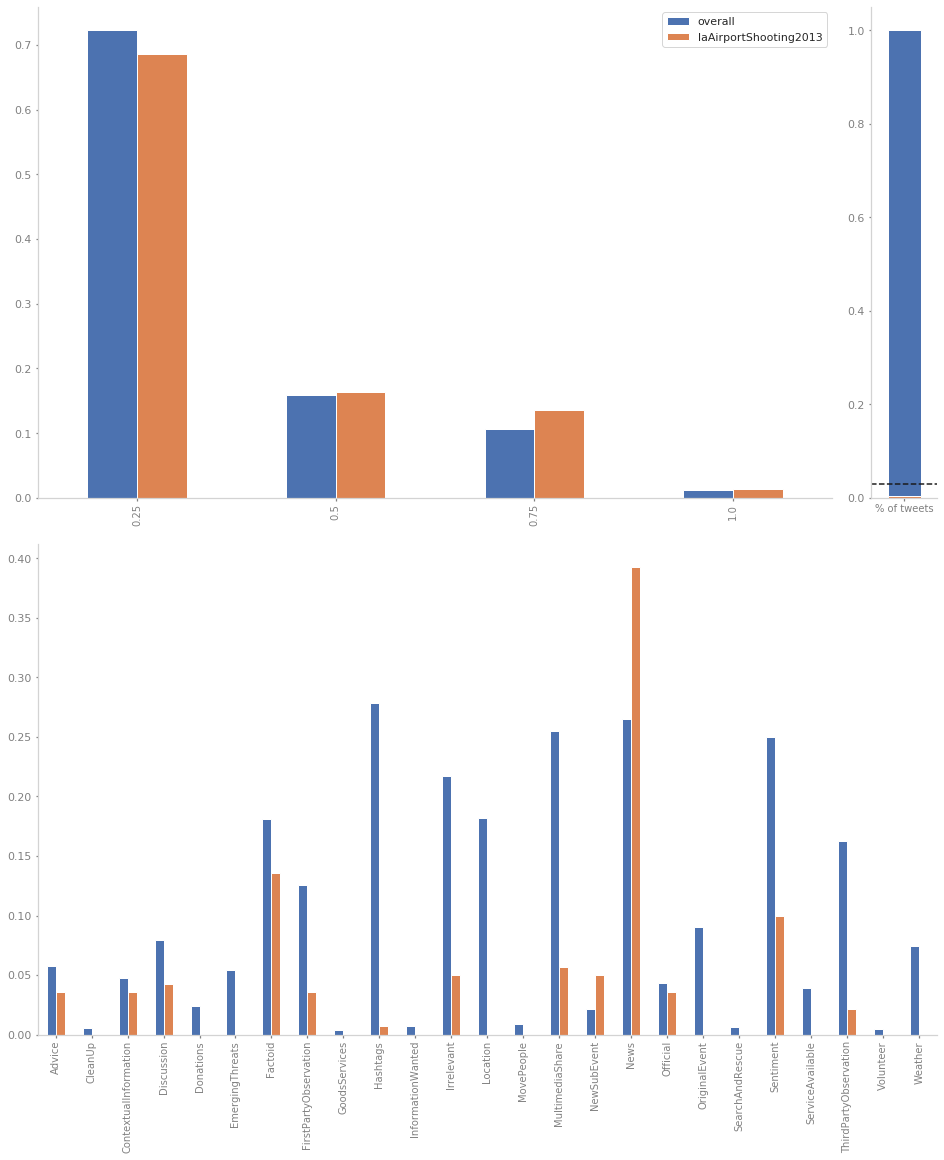

typhoon
                 event_id  num_tweets  %_of_tot  rank_labels  rank_priority  \
19     typhoonHagupit2014        3502  0.108944           10              9   
25  hurricaneFlorence2018        1724  0.053632            1             19   
6        typhoonPablo2012         198  0.006160            8             24   
28     cycloneKenneth2019        1811  0.056338           25              8   
0       joplinTornado2011          92  0.002862           14             28   
16     typhoonYolanda2013         468  0.014559           17             25   

    avg_rank  weighted_rank  
19       9.5            9.5  
25      10.0           10.0  
6       16.0           16.0  
28      16.5           16.5  
0       21.0           21.0  
16      21.0           21.0  


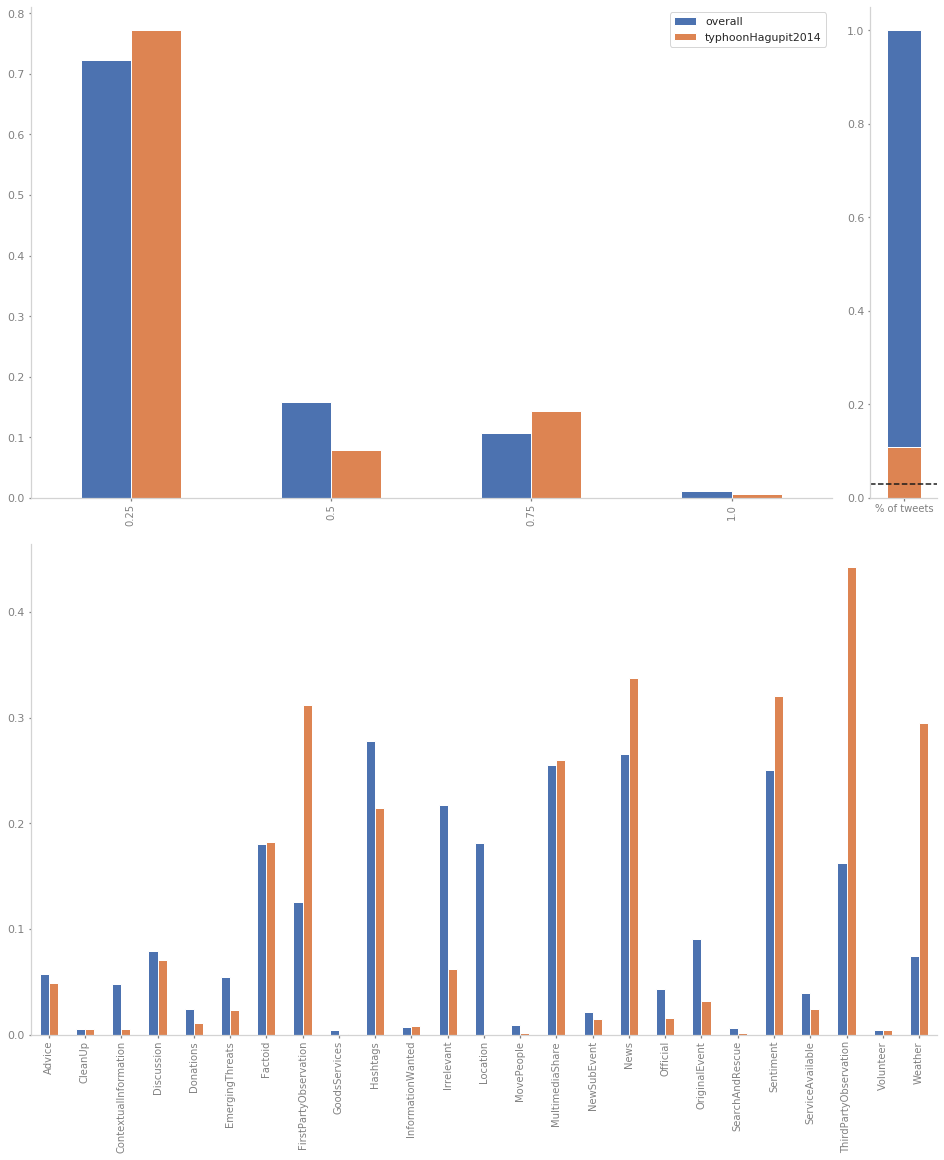

wildfire
                 event_id  num_tweets  %_of_tot  rank_labels  rank_priority  \
22            fireYMM2016        2415  0.075128           22              3   
32   albertaWildfires2019        1858  0.057801           21              5   
2        fireColorado2012         239  0.007435            7             23   
13  australiaBushfire2013         579  0.018012           28              6   

    avg_rank  weighted_rank  
22      12.5           12.5  
32      13.0           13.0  
2       15.0           15.0  
13      17.0           17.0  


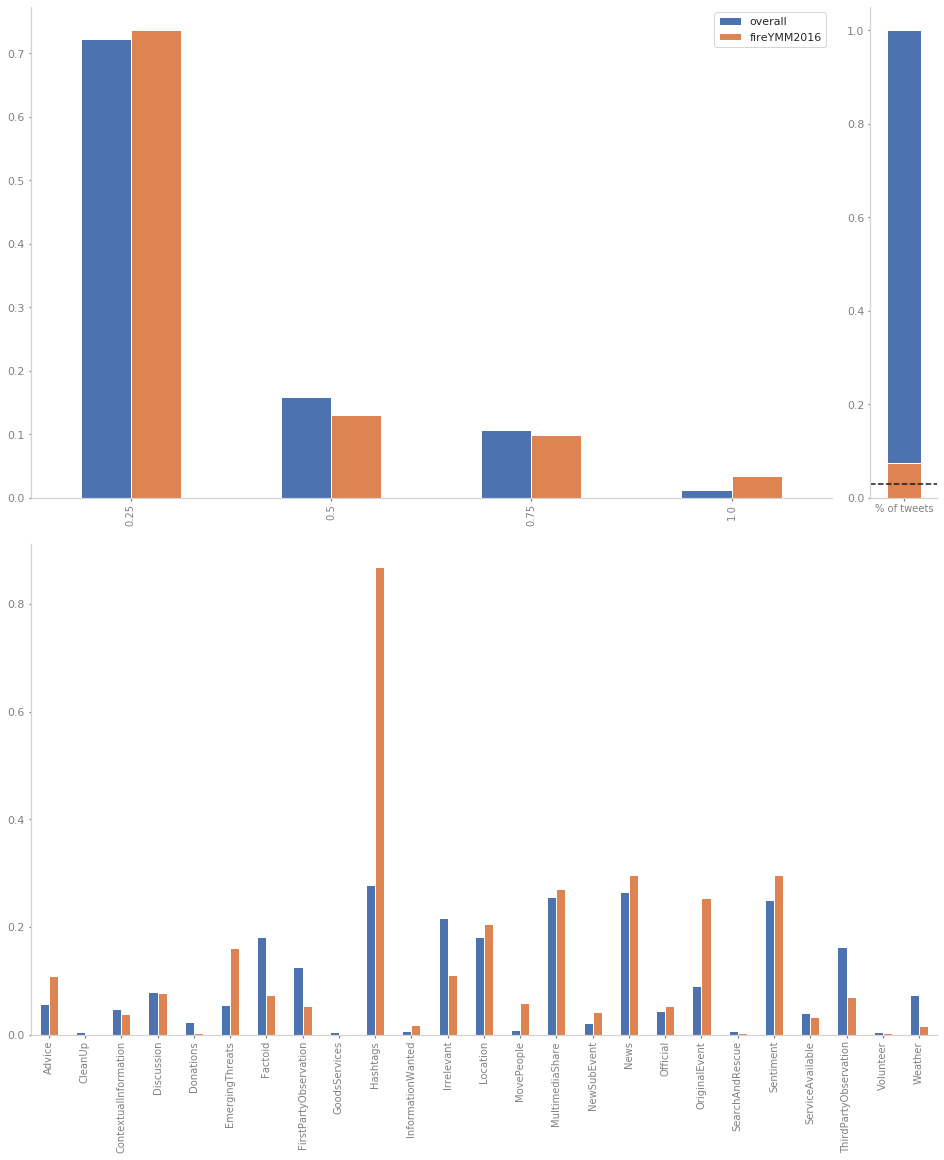

In [11]:
cols = [cols for cols in ranks.columns if cols not in ['event_type', '%_rest']]
avg_perc_of_tot = np.mean(ranks['%_of_tot'])

for (event_type, event_df) in iter(ranks.groupby('event_type')):
    _sorted = event_df.sort_values('weighted_rank')
    print(event_type)
    print(_sorted[cols])
    
    event_id = _sorted.event_id.iloc[0]
    perc_in_tot = _sorted['%_of_tot'].iloc[0]
    
    
    fig = plt.figure(figsize=(13,16), constrained_layout=True)
    gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[12,1])
    
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[1,:])
    
    priority_porportions[['overall', event_id]].plot(kind='bar', ax=ax1)
    
    event_df[event_df.event_id == event_id][['%_of_tot', '%_rest']] \
            .plot(kind='bar', use_index=False, stacked=True, legend=None,
                  color=sns.color_palette()[:2][::-1], ax=ax2)
    ax2.set_xticklabels(['% of tweets'], rotation='horizontal')
    ax2.axhline(avg_perc_of_tot, ls='--', c='k')
    
    label_proportions[['overall', event_id]].plot(kind='bar', ax=ax3,
                                                  legend=None)
    
    plt.show()
    

In [12]:
_eval_set = {
    'bombing': 'parisAttacks2015',
    'earthquake': 'philippinesEarthquake2019',
    'flood': 'manilaFloods2013',
    'shooting': 'laAirportShooting2013',
    'typhoon': 'hurricaneFlorence2018',
    'wildfire': 'albertaWildfires2019'
}

eval_set_events = _eval_set.values()
train_set_events = [c for c in label_proportions.columns if c != 'overall' and c not in eval_set_events]

In [13]:
train_eval_peek_labels = pd.DataFrame(index=label_proportions.index)

train_eval_peek_labels['overall'] = annots[info_types].sum(axis='index')
train_eval_peek_labels['train'] = annots[annots.eventID.isin(train_set_events)][info_types].sum(axis='index')
train_eval_peek_labels['test'] = annots[annots.eventID.isin(eval_set_events)][info_types].sum(axis='index')

train_eval_peek_labels

,overall,train,test
Advice,1843,1460,383
CleanUp,175,109,66
ContextualInformation,1534,1389,145
Discussion,2556,2065,491
Donations,778,673,105
EmergingThreats,1750,1310,440
Factoid,5809,4780,1029
FirstPartyObservation,4033,3396,637
GoodsServices,136,104,32
Hashtags,8946,6416,2530


In [14]:
all(train_eval_peek_labels.overall 
    == train_eval_peek_labels.train + train_eval_peek_labels.test)

True

In [15]:
train_eval_peek_labels_props = train_eval_peek_labels.copy()

train_eval_peek_labels_props.overall = train_eval_peek_labels_props.overall / len(annots)
train_eval_peek_labels_props.train = (train_eval_peek_labels_props.train \
                                     / len(annots[annots.eventID.isin(train_set_events)]))
train_eval_peek_labels_props.test = (train_eval_peek_labels_props.test \
                                    / len(annots[annots.eventID.isin(eval_set_events)]))

train_eval_peek_labels_props

,overall,train,test
Advice,0.057334,0.059432,0.050534
CleanUp,0.005444,0.004437,0.008708
ContextualInformation,0.047721,0.056542,0.019132
Discussion,0.079515,0.084059,0.064784
Donations,0.024203,0.027396,0.013854
EmergingThreats,0.054441,0.053326,0.058055
Factoid,0.180712,0.194578,0.135770
FirstPartyObservation,0.125463,0.138240,0.084048
GoodsServices,0.004231,0.004233,0.004222
Hashtags,0.278301,0.261174,0.333817


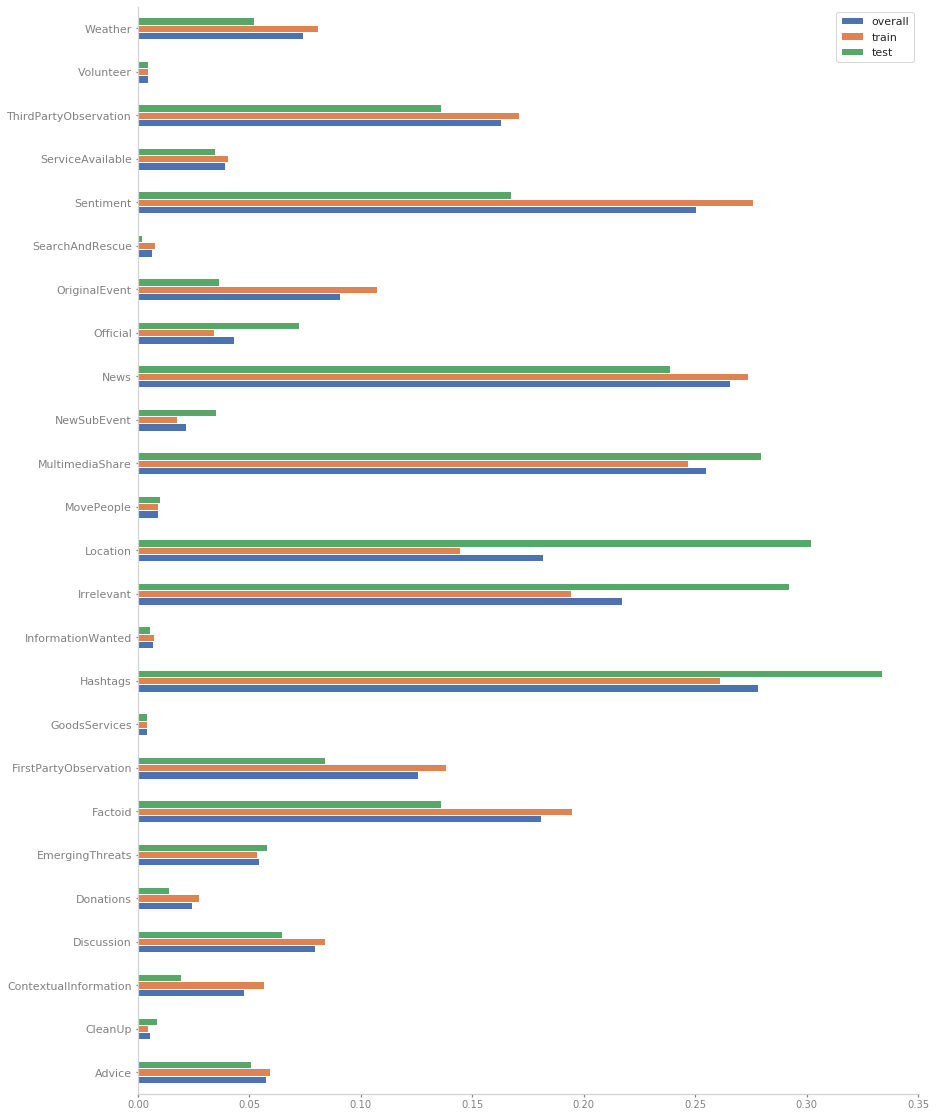

In [16]:
train_eval_peek_labels_props.plot(kind='barh', figsize=(14,20))